TP ESPECIAL FUNDAMENTOS DE LA CIENCIA DE DATOS 2024 

DATASET: CALIDAD DE AGUA DEL RÍO DE LA PLATA - 2022

INTEGRANTES:
Abril Valentina Valentina Juarez, Matias Müller Gonzales y Julián Elias Rivero

In [37]:
!pip install matplotlib
!pip install fancyimpute


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer,KNN
from sklearn.impute import KNNImputer

In [39]:
raw_dataset = pd.read_csv("Calidad_de_agua_2022.csv", sep =";")

Desplegamos el dataset para realizar un vistazo generico

In [40]:
raw_dataset

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,23/2/2022,2022,Verano,24.5,23.3,5.3,6.56,...,6.2,29,90,<0.10,<0.005,<0.001,<10,<0.20,55,Muy deteriorada
1,2,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,2022,Verano,25.4,23.3,2.25,6.56,...,5.8,29,34,<0.10,<0.005,<0.001,<10,<0.20,42,Extremadamente deteriorada
2,3,Canal Aliviador y Río Lujan,TI002,23/2/2022,2022,Verano,24.6,23.3,2.94,6.59,...,1.9,29,17,<0.10,<0.005,<0.001,<10,0.2,45,Muy deteriorada
3,4,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,2022,Verano,25.2,23.3,2.22,7.45,...,5.8,29,23,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
4,5,Río Reconquista y Río Lujan,TI004,23/2/2022,2022,Verano,24.1,20,1.02,6.39,...,2.6,59,18,<0.10,<0.005,<0.001,<10,<0.20,44,Extremadamente deteriorada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,Balneario Palo Blanco,BS092,31/10/2022,2022,Primavera,10,12,no se midió,no se midió,...,no se midió,<30,23,<0.10,<0.005,<0.001,2.1,<0.15,43,Extremadamente deteriorada
164,39,Diagonal 66 (descarga cloaca),BS095,31/10/2022,2022,Primavera,10,12,no se midió,no se midió,...,no se midió,31,18.2,<0.10,<0.005,<0.001,20.2,<0.15,37,Extremadamente deteriorada
165,40,Playa La Bagliardi,BS091,31/10/2022,2022,Primavera,10,12,no se midió,no se midió,...,no se midió,<30,40,<0.10,<0.005,<0.001,0.2,<0.15,49,Muy deteriorada
166,41,Balneario Municipal,BS094,31/10/2022,2022,Primavera,10,12,no se midió,no se midió,...,no se midió,39,90,<0.10,5,<0.001,10.5,<0.15,39,Extremadamente deteriorada


Ahora le pedimos un poco de informacion para analizar contexto de los datos

In [41]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    168 non-null    int64 
 1   sitios                   168 non-null    object
 2   codigo                   168 non-null    object
 3   fecha                    168 non-null    object
 4   año                      168 non-null    object
 5   campaña                  168 non-null    object
 6   tem_agua                 168 non-null    object
 7   tem_aire                 166 non-null    object
 8   od                       168 non-null    object
 9   ph                       168 non-null    object
 10  olores                   168 non-null    object
 11  color                    168 non-null    object
 12  espumas                  168 non-null    object
 13  mat_susp                 168 non-null    object
 14  colif_fecales_ufc_100ml  167 non-null    o

En total tenemos 31 columnas (atributos) y 168 filas (observaciones). Se puede ver que hay ciertas columnas con NULL y que el tipo de datos practicamente es OBJECT exceptuando la primer columna "orden" que es de tipo INT64.

In [42]:
raw_dataset.head()

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,23/2/2022,2022,Verano,24.5,23.3,5.3,6.56,...,6.2,29,90,<0.10,<0.005,<0.001,<10,<0.20,55,Muy deteriorada
1,2,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,2022,Verano,25.4,23.3,2.25,6.56,...,5.8,29,34,<0.10,<0.005,<0.001,<10,<0.20,42,Extremadamente deteriorada
2,3,Canal Aliviador y Río Lujan,TI002,23/2/2022,2022,Verano,24.6,23.3,2.94,6.59,...,1.9,29,17,<0.10,<0.005,<0.001,<10,0.2,45,Muy deteriorada
3,4,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,2022,Verano,25.2,23.3,2.22,7.45,...,5.8,29,23,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
4,5,Río Reconquista y Río Lujan,TI004,23/2/2022,2022,Verano,24.1,20,1.02,6.39,...,2.6,59,18,<0.10,<0.005,<0.001,<10,<0.20,44,Extremadamente deteriorada


A simple vista veo que tendremos que tratar lo siguiente:
1) Hay valores que enves de tener un tipo de dato cuantitativo en el atributo, tienen un string categorico que dice "no se midio", por ejemplo en OD(oxigeno disuelto), esto deberia de ser reemplazado (ver despues con que).
2) Hay datos cuantitativos que adelante del valor numerico tienen un string "<", como en el caso de las mediciones de los contaminantes en el agua.
Podriamos de alguna manera, mediante una funcion operar y captar ese string para borrar todas las ocurrencias. 
3) Hay datos cualitativos nominales que indican "presencia" o "ausencia" de algun compuesto en el agua, pueden ser reemplazados por {0, 1} de acuerdo a su impacto en la muestra.
4) Hay datos cualitativos ordinales como "muy deteriorada" o "extremadamente deteriorada" que hacen referencia al agua de esa zona, podrian ser reemplazados mediante transformacion "ordinal encoding" ya que el orden es significativo. Algo del estilo... Rating: {low, medium, high} → {1,2,3}

Veamos cuantos valores repetidos tiene el dataset

In [43]:
raw_dataset.duplicated().sum()

np.int64(0)

Por lo visto no existe valores repetidos a simple vista (continuar con la exploracion de valores duplicados)

Ya que empezaremos a modificar el dataset, una buena practica es copiar el dataset

In [44]:
copy_dataset = raw_dataset.copy()

podemos eliminar columnas que no tienen mucho sentido, como por ejemplo "orden" y vamos a eliminar "año", ya que todas(revisar que hay 5 observaciones que tienen "no se midio") las observaciones se hicieron en 2022 y no agregan mucha informacion

In [45]:
copy_dataset = copy_dataset.drop("orden",axis=1)
copy_dataset = copy_dataset.drop("año",axis=1)
copy_dataset

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,TI001,23/2/2022,Verano,24.5,23.3,5.3,6.56,Ausencia,Ausencia,...,6.2,29,90,<0.10,<0.005,<0.001,<10,<0.20,55,Muy deteriorada
1,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,Verano,25.4,23.3,2.25,6.56,Presencia,Presencia,...,5.8,29,34,<0.10,<0.005,<0.001,<10,<0.20,42,Extremadamente deteriorada
2,Canal Aliviador y Río Lujan,TI002,23/2/2022,Verano,24.6,23.3,2.94,6.59,Ausencia,Presencia,...,1.9,29,17,<0.10,<0.005,<0.001,<10,0.2,45,Muy deteriorada
3,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,Verano,25.2,23.3,2.22,7.45,Presencia,Presencia,...,5.8,29,23,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
4,Río Reconquista y Río Lujan,TI004,23/2/2022,Verano,24.1,20,1.02,6.39,Ausencia,Presencia,...,2.6,59,18,<0.10,<0.005,<0.001,<10,<0.20,44,Extremadamente deteriorada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Balneario Palo Blanco,BS092,31/10/2022,Primavera,10,12,no se midió,no se midió,Ausencia,Ausencia,...,no se midió,<30,23,<0.10,<0.005,<0.001,2.1,<0.15,43,Extremadamente deteriorada
164,Diagonal 66 (descarga cloaca),BS095,31/10/2022,Primavera,10,12,no se midió,no se midió,Ausencia,Presencia,...,no se midió,31,18.2,<0.10,<0.005,<0.001,20.2,<0.15,37,Extremadamente deteriorada
165,Playa La Bagliardi,BS091,31/10/2022,Primavera,10,12,no se midió,no se midió,Ausencia,Ausencia,...,no se midió,<30,40,<0.10,<0.005,<0.001,0.2,<0.15,49,Muy deteriorada
166,Balneario Municipal,BS094,31/10/2022,Primavera,10,12,no se midió,no se midió,Ausencia,Ausencia,...,no se midió,39,90,<0.10,5,<0.001,10.5,<0.15,39,Extremadamente deteriorada


Ahora vamos a ver que columnas tienen nulos

In [46]:
copy_dataset.isna().sum()

sitios                      0
codigo                      0
fecha                       0
campaña                     0
tem_agua                    0
tem_aire                    2
od                          0
ph                          0
olores                      0
color                       0
espumas                     0
mat_susp                    0
colif_fecales_ufc_100ml     1
escher_coli_ufc_100ml       1
enteroc_ufc_100ml           1
nitrato_mg_l                0
nh4_mg_l                    0
p_total_l_mg_l              0
fosf_ortofos_mg_l           0
dbo_mg_l                    1
dqo_mg_l                    0
turbiedad_ntu               0
hidr_deriv_petr_ug_l        0
cr_total_mg_l               0
cd_total_mg_l               0
clorofila_a_ug_l            1
microcistina_ug_l           0
ica                        13
calidad_de_agua            14
dtype: int64

Pareciera que existen muy pocos nulos, pero vamos a ver que sucede con el "no se midió" , asi que vamos a mostrar algunos ejemplos

In [47]:
copy_dataset[copy_dataset["dbo_mg_l"] == "no se midió"] #poner algun otro ejemplo

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
10,Espigón La Farola,SI021,23/2/2022,Verano,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,...,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN
12,Playa Espigón de Pacheco,SI024,23/2/2022,Verano,26.5,27,5.3,7.49,Ausencia,Ausencia,...,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN
17,Parque de los Niños,CA041,23/2/2022,Verano,26.1,no se midió,4.8,7.4,Ausencia,Ausencia,...,no se midió,29,22,no se midió,<0.005,<0.002,no se midió,no se midió,54,Muy deteriorada
27,Náutico 400 m,QU062,23/2/2022,Verano,24,23,9.59,7.94,Ausencia,Ausencia,...,no se midió,29,26,<0.10,<0.005,<0.001,28,1,48,Muy deteriorada
30,Puerto Trinidad calle 47,BZ077,23/2/2022,Verano,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,...,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN
52,Espigón La Farola,SI021,4/5/2022,otoño,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,...,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN
65,Arroyo Sarandí,AV052,4/5/2022,otoño,18.4,14,4.46,7.5,Ausente,Ausente,...,no se midió,80,23,<0.10,0.008,<0.001,<10,<0.15,38,Extremadamente deteriorada
66,Costa de Villa Domínico,AV055,4/5/2022,otoño,17,14,2.28,7.6,Ausente,Ausente,...,no se midió,84,13,<0.10,0.007,<0.001,<10,<0.15,35,Extremadamente deteriorada
67,Arroyo Santo Domingo,AV053,4/5/2022,otoño,17.9,14,3.43,7.46,Ausente,Ausente,...,no se midió,53,22,<0.10,0.006,<0.001,<10,<0.15,39,Extremadamente deteriorada
94,Espigón La Farola,SI021,23/8/2022,invierno,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,...,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN


Como pudimos ver hay muchisimos "no se midió" que representa NA, entonces vamos a convertir para todas las columnas
el "no se midió" a NA

In [48]:
lista_columnas = copy_dataset.columns

for col in lista_columnas:
    copy_dataset[col] = copy_dataset[col].replace(['no midieron este día', 'no se midió', 'no se determinó','No se midió',
                                                   'no midio la sonda','NA'], pd.NA)

Una vez pasado todos los valores a NA vamos a contar cuantos NA tenemos por cada variable

In [49]:
copy_dataset.isna().sum()

sitios                      0
codigo                      0
fecha                       5
campaña                     5
tem_agua                   23
tem_aire                   24
od                         36
ph                         28
olores                     13
color                      13
espumas                    13
mat_susp                   13
colif_fecales_ufc_100ml    15
escher_coli_ufc_100ml      15
enteroc_ufc_100ml          15
nitrato_mg_l               14
nh4_mg_l                   14
p_total_l_mg_l             21
fosf_ortofos_mg_l          14
dbo_mg_l                   58
dqo_mg_l                   14
turbiedad_ntu              14
hidr_deriv_petr_ug_l       18
cr_total_mg_l              17
cd_total_mg_l              17
clorofila_a_ug_l           18
microcistina_ug_l          18
ica                        14
calidad_de_agua            14
dtype: int64

entonces surge la siguiente duda ¿son muchos o son pocos nulos?, para eso calcularemos la suma total de nulos de cada variable y lo dividiremos por la cantidad de columnas

In [50]:
promedio_nulos = (copy_dataset.isna().sum() / copy_dataset.shape[0]).sum()/copy_dataset.columns.value_counts().sum()
print(promedio_nulos)

0.09913793103448278


Con esto vemos que en promedio cada variable tiene un 9,7% de valores nulos

In [51]:
copy_dataset.isna().sum() / copy_dataset.shape[0]

sitios                     0.000000
codigo                     0.000000
fecha                      0.029762
campaña                    0.029762
tem_agua                   0.136905
tem_aire                   0.142857
od                         0.214286
ph                         0.166667
olores                     0.077381
color                      0.077381
espumas                    0.077381
mat_susp                   0.077381
colif_fecales_ufc_100ml    0.089286
escher_coli_ufc_100ml      0.089286
enteroc_ufc_100ml          0.089286
nitrato_mg_l               0.083333
nh4_mg_l                   0.083333
p_total_l_mg_l             0.125000
fosf_ortofos_mg_l          0.083333
dbo_mg_l                   0.345238
dqo_mg_l                   0.083333
turbiedad_ntu              0.083333
hidr_deriv_petr_ug_l       0.107143
cr_total_mg_l              0.101190
cd_total_mg_l              0.101190
clorofila_a_ug_l           0.107143
microcistina_ug_l          0.107143
ica                        0

Además vemos que ninguna variable tiene más del 50% de valores faltantes, por ende no eliminaremos ninguna variable 

In [52]:
raw_nulos = (copy_dataset.isna().sum(axis=1) / copy_dataset.shape[1]).sum() / copy_dataset.shape[0]
raw_nulos
#for (copy_dataset.isna().sum(axis=1) / copy_dataset.shape[1] > raw_nulos):


np.float64(0.09913793103448276)

FIJARSE QUE EN LA SIGUIENTE LINEA SE QUITO EL "<" PERO SIGUEN SIENDO STRINGS XD 

In [53]:
copy_dataset[copy_dataset["microcistina_ug_l"] == " <0.15"].value_counts()

sitios                                 codigo  fecha      campaña   tem_agua  tem_aire  od     ph    olores     color      espumas   mat_susp   colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l  dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  ica  calidad_de_agua           
Arroyo Abra Vieja y Santa Rosa         TI009   23/8/2022  invierno  15.6      15        8.68   7.13  Ausencia   Ausencia   Ausencia  Ausencia   3200                     2                      250                2.4           0.11      0.12            0.12               <2.0      <30       33              <0.10                <0.005         <0.001         200                <0.15             51   Muy deteriorada               1
Arroyo El Gato                         EN083   23/8/2022  invierno  12.8      9         2.49   8.01  Ausencia   Ausencia   Ausencia  Ausencia  

In [54]:
columnas = [
    "nh4_mg_l",
    "p_total_l_mg_l",
    "fosf_ortofos_mg_l",
    "dbo_mg_l",
    "dqo_mg_l",
    "turbiedad_ntu",
    "hidr_deriv_petr_ug_l",
    "cr_total_mg_l",
    "cd_total_mg_l",
    "clorofila_a_ug_l",
    "microcistina_ug_l"
]
for col in columnas:
    copy_dataset[col] = copy_dataset[col].str.strip("<")
    copy_dataset[col] = copy_dataset[col].str.strip(" <") #Agruegue este caso xD ¿como cargaron el NBSP?

ahora veamos la variable "cd_total_mg_l"

In [55]:
copy_dataset[copy_dataset["cd_total_mg_l"] == "0.001"].value_counts()

sitios                          codigo  fecha      campaña   tem_agua  tem_aire  od    ph    olores     color     espumas   mat_susp   colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l  dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  ica  calidad_de_agua           
Arroyo Abra Vieja y Santa Rosa  TI009   23/2/2022  Verano    23.4      21        4.49  6.76  Ausencia   Ausencia  Ausencia  Ausencia   400                      100                    220                1.9           0.1       0.21            0.19               1.9       29        39             0.10                  0.005          0.001          10                0.20               58   Muy deteriorada               1
                                        23/8/2022  invierno  15.6      15        8.68  7.13  Ausencia   Ausencia  Ausencia  Ausencia   3200                     2

Entendiendo que al quitar el signo "<" no cambiamos el tipo de la variable, sino el string, entonces vamos a pasarla a tipo entero

In [56]:
mgl_map = {
    "0.001":0.001,
    "0.002":0.002
}
copy_dataset["cd_total_mg_l"] = copy_dataset["cd_total_mg_l"].map(mgl_map)
copy_dataset["cd_total_mg_l"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 168 entries, 0 to 167
Series name: cd_total_mg_l
Non-Null Count  Dtype  
--------------  -----  
151 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


Ahora continuaremos haciendo lo mismo, para todas estas variables que le quitamos el signo "<"

In [57]:
copy_dataset["nh4_mg_l"].value_counts()

nh4_mg_l
0.05     18
0.049    12
2         5
0.1       5
0.41      5
         ..
0.15      1
2.3       1
0.4       1
0.38      1
0.55      1
Name: count, Length: 84, dtype: int64

Para pasar los strings a int/float debo hacer imputacion LUEGO VER QUE TECNICA UTILIZAR

Ahora haremos un mapeo para la variable "calidad_de_agua"

In [58]:
niveles_deterioro = {
    "Deteriorada" : 1,
    "Muy deteriorada" : 2,
    "Extremadamente deteriorada" : 3
}

copy_dataset["calidad_de_agua"] = copy_dataset["calidad_de_agua"].map(niveles_deterioro)

Seguimos con los mapeos para las siguientes variables: "olores", "color", "espumas", "mat_susp"

In [59]:
mapeo_dicotomico = {
    "Ausencia" : 0,
    "Ausente" : 0,
    "ausencia" : 0,
    "presencia" : 1,
    "Presencia" : 1
}

copy_dataset["olores"] = copy_dataset["olores"].map(mapeo_dicotomico)
copy_dataset["color"] = copy_dataset["color"].map(mapeo_dicotomico)
copy_dataset["espumas"] = copy_dataset["espumas"].map(mapeo_dicotomico)
copy_dataset["mat_susp"] = copy_dataset["mat_susp"].map(mapeo_dicotomico)
copy_dataset

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,TI001,23/2/2022,Verano,24.5,23.3,5.3,6.56,0.0,0.0,...,6.2,29,90,0.10,0.005,0.001,10,0.20,55,2.0
1,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,Verano,25.4,23.3,2.25,6.56,1.0,1.0,...,5.8,29,34,0.10,0.005,0.001,10,0.20,42,3.0
2,Canal Aliviador y Río Lujan,TI002,23/2/2022,Verano,24.6,23.3,2.94,6.59,0.0,1.0,...,1.9,29,17,0.10,0.005,0.001,10,0.2,45,2.0
3,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,Verano,25.2,23.3,2.22,7.45,1.0,1.0,...,5.8,29,23,0.10,0.005,0.001,10,0.20,46,2.0
4,Río Reconquista y Río Lujan,TI004,23/2/2022,Verano,24.1,20,1.02,6.39,0.0,1.0,...,2.6,59,18,0.10,0.005,0.001,10,0.20,44,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Balneario Palo Blanco,BS092,31/10/2022,Primavera,10,12,<NA>,<NA>,0.0,0.0,...,<NA>,30,23,0.10,0.005,0.001,2.1,0.15,43,3.0
164,Diagonal 66 (descarga cloaca),BS095,31/10/2022,Primavera,10,12,<NA>,<NA>,0.0,1.0,...,<NA>,31,18.2,0.10,0.005,0.001,20.2,0.15,37,3.0
165,Playa La Bagliardi,BS091,31/10/2022,Primavera,10,12,<NA>,<NA>,0.0,0.0,...,<NA>,30,40,0.10,0.005,0.001,0.2,0.15,49,2.0
166,Balneario Municipal,BS094,31/10/2022,Primavera,10,12,<NA>,<NA>,0.0,0.0,...,<NA>,39,90,0.10,5,0.001,10.5,0.15,39,3.0


A continuacion vamos a cambiar dos valores de la variable "fecha", ya que la fecha de la medicion se cargo como "31/10/0202" cuando en realidad se quiso cargar "31/10/2022"

In [60]:
copy_dataset["fecha"] = copy_dataset["fecha"].replace("31/10/0202", "31/10/2022")
copy_dataset["fecha"].value_counts()

fecha
23/2/2022     42
4/5/2022      42
23/8/2022     42
31/10/2022    37
Name: count, dtype: int64

In [61]:
copy_dataset = copy_dataset.dropna(thresh=14) # se borra por que la mitad de los datos tienen nulls

In [62]:
#Esto dijo la profe xd
#imputer = IterativeImputer(estimator=KNN(k=2),initial_strategy='mean',max_iter=10,random_state=0)
#df_imputed = pd.DataFrame(imputer.fit_transform(copy_dataset),columns=copy_dataset.columns)

Segunda idea, hacer un agrupamiento por estaciones y ver la mediana/media y en funcion de eso decidir que como se imputará 

Debido a la poca existencia de outliers, vamos a hacer una imputacion por mediana 

In [63]:
copy_dataset["od"] = pd.to_numeric(copy_dataset["od"], errors='coerce') #checkear
variable_od = copy_dataset["od"].median()
copy_dataset["od"].fillna(variable_od,inplace = True)
copy_dataset["od"]

C:\Users\elret\AppData\Local\Temp\ipykernel_10264\824139597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_dataset["od"] = pd.to_numeric(copy_dataset["od"], errors='coerce') #checkear
C:\Users\elret\AppData\Local\Temp\ipykernel_10264\824139597.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the ori

0      5.30
1      2.25
2      2.94
3      2.22
4      1.02
       ... 
163    6.70
164    6.70
165    6.70
166    6.70
167    6.70
Name: od, Length: 154, dtype: float64

In [64]:
columnas = [
    "tem_agua",
    "tem_aire",
    "od",
    "ph",
    "colif_fecales_ufc_100ml",
    "escher_coli_ufc_100ml",
    "enteroc_ufc_100ml",
    "nitrato_mg_l",
    "nh4_mg_l",
    "p_total_l_mg_l",
    "fosf_ortofos_mg_l",
    "dbo_mg_l",
    "dqo_mg_l",
    "turbiedad_ntu",
    "hidr_deriv_petr_ug_l",
    "cr_total_mg_l",
    "cd_total_mg_l",
    "clorofila_a_ug_l",
    "microcistina_ug_l"
]
for col in columnas:
    copy_dataset[col] = pd.to_numeric(copy_dataset[col], errors= 'coerce')
    mediana = copy_dataset[col].median()
    copy_dataset[col].fillna(mediana,inplace= True)

C:\Users\elret\AppData\Local\Temp\ipykernel_10264\487378216.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_dataset[col] = pd.to_numeric(copy_dataset[col], errors= 'coerce')
C:\Users\elret\AppData\Local\Temp\ipykernel_10264\487378216.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original obj

Ya tenemos el dataset preparado para empezar con el modelado de variables y deducir relaciones entre distintas variables

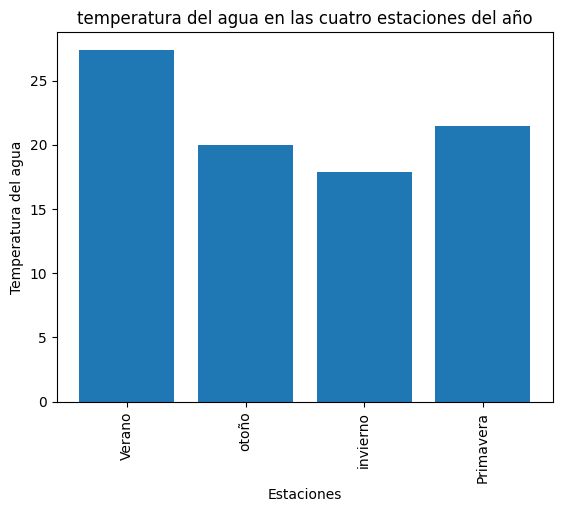

In [67]:
verano = copy_dataset[copy_dataset["campaña"] == "Verano"]
plt.bar(copy_dataset["campaña"],copy_dataset["tem_agua"])

plt.xlabel("Estaciones")
plt.ylabel("Temperatura del agua")

plt.title("temperatura del agua en las cuatro estaciones del año")
plt.xticks(rotation=90)

plt.show()

Compilacion de distintas ideas:                                                                                                                       
1_A mayor olor peor color => Analizar relacion entre variables                                                                                        
2_A mayor turbidez menos cristalina es el agua                                                                                                        
3_Analizar el cambio de la calidad del agua en funcion de como pasan las distintas estaciones                                                         
4_Analizar si en de una variable sola afecta en la calidad del agua, en contraste a un conjunto de variables

PERPLEXITY. AI
CONSENSUS.APP
ELECIT.AI